## 1. Download StyleGan2 library and the trained model
## 2. Modify the code to run on cpus.

In [9]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

%cd stylegan2-ada-pytorch
!sed -n '82p' generate.py 
!sed -ie '82s/.*/    device = torch.device("cpu")/' generate.py
!sed -n '82p' generate.py

!sed -n '119p' generate.py
!sed -ie '119s/.*/        img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode, force_fp32=True)/' generate.py
!sed -n '119p' generate.py

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.
--2021-08-10 18:12:49--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.225.114.57, 13.225.114.64, 13.225.114.22, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.225.114.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl.1’

ffhq.pkl.1          100%[===================>] 363.94M  9.93MB/s    in 37s     

2021-08-10 18:13:27 (9.76 MB/s) - ‘ffhq.pkl.1’ saved [381624121/381624121]

/Users/wonseok/workspace/ai_lib/stylegan2-ada-pytorch
    device = torch.device("cpu")
    device = torch.device("cpu")
        z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
        img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode, force_fp32=True)


## 3. Import required libraries


In [2]:
import sys, os
from  pathlib import Path

project_dir = Path("/content/stylegan2-ada-pytorch")
sys.path.append(os.path.abspath(project_dir))

import torch
import numpy as np
import matplotlib.pylab as plt

import legacy

## 4. Generate artificial image

In [44]:
!sed -n '118p' generate.py
!sed -ie '118s/.*/        z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)\n/' generate.py
!sed -ie '119s/.*/        z += 1.1*torch.randn(1, G.z_dim).to(device)/' generate.py

!python generate.py --outdir=out --network ../ffhq.pkl --seeds=1

        z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
Loading networks from "../ffhq.pkl"...
Generating image for seed 1 (0/1) ...
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


## 5. Plot the generated images

out/seed0001.png
out/seed0000.png
out/seed0002.png


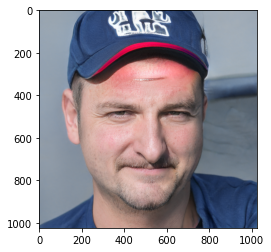

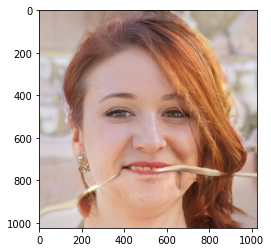

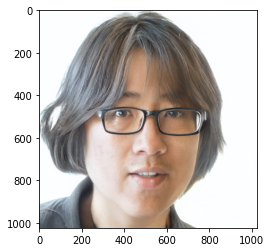

In [45]:
fnames = os.listdir('./out')
for fname in fnames:
  if fname.endswith('.png'):
    path_load = Path('./out') / fname 
    print(path_load)
    img = plt.imread(path_load)
    plt.figure()
    plt.imshow(img)